Link Video : https://binusianorg-my.sharepoint.com/personal/arvio_anandi_binus_ac_id/_layouts/15/guestaccess.aspx?docid=0694d727706344ddcacaf76411fb8d5ae&authkey=AQx9-vaR2hD38pBiUN3SDns&e=3fTYMz

In [1]:
import os
import time
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras as keras
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
from keras import regularizers
from sklearn.model_selection import KFold
import random 
from random import randint
import pandas as pd
import seaborn as sns
from scipy.stats import skew
from keras.utils import to_categorical
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings("ignore")

# 1A. Data preprocess

In [2]:
df = pd.read_csv('C:/Users/user/Downloads/insurance.csv')
df

,age,sex,bmi,steps,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,3009,0,1,3,16884.92400,1
1,18,1,33.770,3008,1,0,2,1725.55230,1
2,28,1,33.000,3009,3,0,2,4449.46200,0
3,33,1,22.705,10009,0,0,1,21984.47061,0
4,32,1,28.880,8010,0,0,1,3866.85520,1
...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,4008,3,0,1,10600.54830,0
1334,18,0,31.920,3003,0,0,0,2205.98080,1
1335,18,0,36.850,3008,0,0,2,1629.83350,1
1336,21,0,25.800,8009,0,0,3,2007.94500,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             1338 non-null   int64  
 1   sex             1338 non-null   int64  
 2   bmi             1338 non-null   float64
 3   steps           1338 non-null   int64  
 4   children        1338 non-null   int64  
 5   smoker          1338 non-null   int64  
 6   region          1338 non-null   int64  
 7   charges         1338 non-null   float64
 8   insuranceclaim  1338 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 94.2 KB


8 features, 1 target feature. 7 integer type data, 2 float type data. No categorical data that needs to be handled.

In [4]:
df.isnull().sum()

age               0
sex               0
bmi               0
steps             0
children          0
smoker            0
region            0
charges           0
insuranceclaim    0
dtype: int64

No missing data.

In [5]:
# Identify duplicate rows
duplicates = df[df.duplicated()]

# Print the duplicate rows
print("Duplicate Rows except first occurrence based on all columns are :")
print(duplicates)

Duplicate Rows except first occurrence based on all columns are :
Empty DataFrame
Columns: [age, sex, bmi, steps, children, smoker, region, charges, insuranceclaim]
Index: []


No duplicated data.

In [6]:
df.describe(include="all")

,age,sex,bmi,steps,children,smoker,region,charges,insuranceclaim
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,5328.623318,1.094918,0.204783,1.515695,13270.422265,0.585202
std,14.049960,0.500160,6.098187,2453.643236,1.205493,0.403694,1.104885,12110.011237,0.492871
min,18.000000,0.000000,15.960000,3000.000000,0.000000,0.000000,0.000000,1121.873900,0.000000
25%,27.000000,0.000000,26.296250,3008.000000,0.000000,0.000000,1.000000,4740.287150,0.000000
50%,39.000000,1.000000,30.400000,4007.000000,1.000000,0.000000,2.000000,9382.033000,1.000000
75%,51.000000,1.000000,34.693750,8004.000000,2.000000,0.000000,2.000000,16639.912515,1.000000
max,64.000000,1.000000,53.130000,10010.000000,5.000000,1.000000,3.000000,63770.428010,1.000000


- The difference on 3rd quarter and max on charges, children, bmi, and smoker does not make good sense of the standard deviation value, therefore there could possibly be an outlier in these features.

In [7]:
# Checking the skewness of the data
skew_data = skew(df)

print('Skewness of dataset:', skew_data)

Skewness of dataset: [ 0.05561008 -0.0209279   0.28372857  0.66136951  0.93732812  1.46312353
 -0.03805778  1.51417971 -0.34586568]


There is a skewness in steps, children, smoker, and charges features. Therefore, these features are to be transformed by using the square root transformation method to reduce skewness on the data.

In [8]:
# Apply square root transformation to selected columns
feat = ['steps','children','smoker','charges']
# Apply square root transformation multiple times for good measure
for i in range(0,2):
    df[feat] = np.sqrt(df[feat])

The skewed features are first collected into 1 variable feat, to be then transformed... using the square root transformation. This method of transformation is utilized because the features to be transformed are positive values, therefore square root method is applied. The transformation method is applied multiple times for good measure

In [9]:
skew_data = skew(df)

print('Skewness of dataset:', skew_data)

Skewness of dataset: [ 0.05561008 -0.0209279   0.28372857  0.47145255 -0.17819569  1.46312353
 -0.03805778  0.36792043 -0.34586568]


The outstanding features' has been reduced significantly close to its optimum skewness.

In [10]:
# Check if dataset suffers imbalance between classes claim = 1 and No claim = 0
s = pd.value_counts(df['insuranceclaim'])

# For class 0
num_claim = s[1]
# For class 1
num_noclaim = s[0]
total_cases = len(df)

# Calculate percentages of data that resides in both classes
percent_c = num_claim / total_cases
percent_n = num_noclaim / total_cases

print("Distribution between Claim and No claim insurance\nPercent claim: {0:.3f}\nPercent no claim: {1:.3f}".format(percent_c, percent_n))

Distribution between Claim and No claim insurance
Percent claim: 0.585
Percent no claim: 0.415


The dataset is balanced.

Overall, the underlying problems found in this dataset include: 
1. Outliers : This is solved by keeping the outliers because after ive checked without outliers, the features become multicollinear, so feature selection was done to solve it but then the model underfits because it was lacking in features, therefore the outliers are kept to prevent underfitting.

2. Data skewness : This is solved by data transformation, using the square root transformation method. This is done because square root transformation method can only be applied to positive values and the values to be transformed are positive values, therefore it is used.

The rest of the data are fit for exploration, therefore we can continue.

# 1B. Data exploration

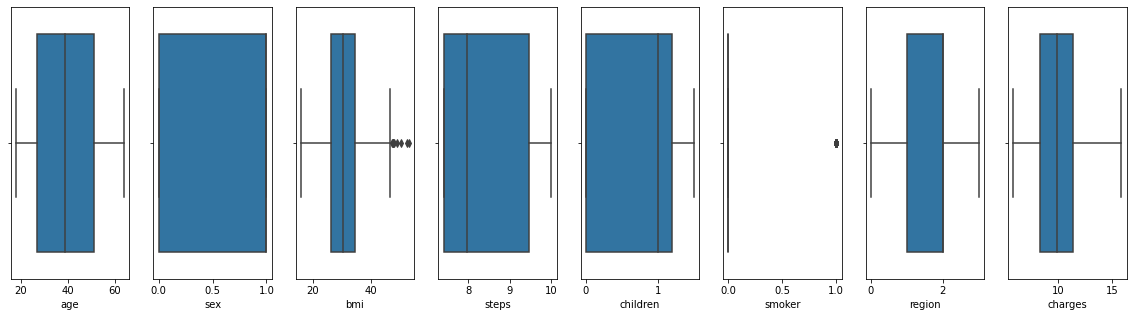

In [11]:
# Select the numerical columns to check for outliers
num_cols = ['age', 'sex','bmi','steps','children', 'smoker', 'region', 'charges']
# Create a box plot for each numerical column in one figure
fig, axs = plt.subplots(ncols=len(num_cols), figsize=(20, 5))
for i, col in enumerate(num_cols):
    sns.boxplot(x=df[col], ax=axs[i])

After square root transformation, there seems to be outliers going out of the 3rd quartile for bmi, and smoker. Since body mass index, and smoking correlates to the decision of an insurance claim and could provide some further insights, therefore the outliers are kept.

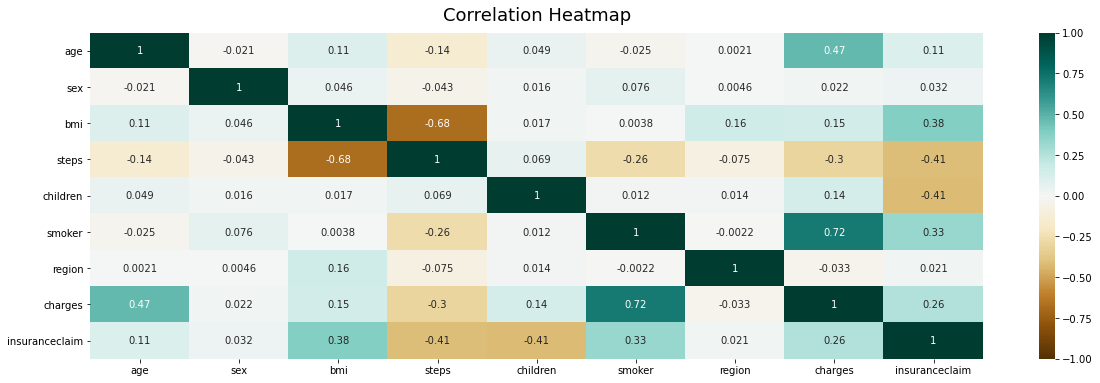

In [12]:
plt.figure(figsize=(20,6))
heatmap=sns.heatmap(df.corr(),vmin=-1, vmax=1, annot=True,cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict = {'fontsize':18},pad=12);

No feature's correlation exceeds p-value 0.8, The features has good correlation with target variable.There are no multicollinearity between the features.Therefore, The features are all kept for further exploration and testing.

In [13]:
# Normalization:
features = ['age', 'sex','bmi','steps','children','smoker', 'region','charges']
X = df[features]
X = (X - np.min(X))/ (np.max(X) - np.min(X))
y = df['insuranceclaim']

The data features are scaled using normalization.

## Splitting the Data

In [14]:
# Split the data into training, validation, and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

The data is split to 80% training data, 10% validation data, and 10% testing data.

# 1C. BPNN Model

In [15]:
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)

The train and validation data is transformed to categorical matrices. This is because it is required for the model to use 
for the target variable.

In [16]:
# Define the number of input nodes and output classes
n = 8  # number of input features
num_classes = 2  # number of output classes

# Define the number of nodes in the hidden layers
hidden_layer_size = 2 * n

# Create the sequential model
model1 = tf.keras.Sequential()

# Add the input layer
model1.add(tf.keras.layers.Dense(n, activation='relu', input_shape=(n,)))

# Add the first hidden layer
model1.add(tf.keras.layers.Dense(hidden_layer_size, activation='relu'))

# Add the second hidden layer
model1.add(tf.keras.layers.Dense(hidden_layer_size, activation='relu'))

# Add the output layer
model1.add(tf.keras.layers.Dense(2, activation='softmax'))

# Compile the model
model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model on training data with validation data
model1.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val))

Epoch 1/100
34/34 [==============================] - 1s 8ms/step - loss: 0.6668 - accuracy: 0.6028 - val_loss: 0.6541 - val_accuracy: 0.5970
Epoch 2/100
34/34 [==============================] - 0s 4ms/step - loss: 0.6416 - accuracy: 0.5925 - val_loss: 0.6266 - val_accuracy: 0.6493
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 0.6068 - accuracy: 0.6935 - val_loss: 0.5882 - val_accuracy: 0.7313
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 0.5600 - accuracy: 0.7393 - val_loss: 0.5423 - val_accuracy: 0.7463
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 0.5042 - accuracy: 0.7720 - val_loss: 0.4970 - val_accuracy: 0.7687
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 0.4584 - accuracy: 0.7850 - val_loss: 0.4720 - val_accuracy: 0.7761
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 0.4289 - accuracy: 0.8019 - val_loss: 0.4536 - val_accuracy: 0.7761
Epoch 8/100
3

The model has details of 2 hidden layers, 2 * n input node , and output node of (n, 2 × n, 2 × n,
num_class)

# 1D. Model Modification

In [17]:
# Return the data back to numerical for model with sigmoid activation function
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [18]:
# Define the number of input nodes 
n = 8  # number of input features

# Define the number of nodes in the hidden layers
hidden_layer_size = 2 * n

model2 = tf.keras.Sequential()

# Add the input layer
model2.add(tf.keras.layers.Dense(n, activation='relu', input_shape=(n,)))
model2.add(tf.keras.layers.BatchNormalization())

# Add the first hidden layer
model2.add(tf.keras.layers.Dense(hidden_layer_size, activation='relu'))
model2.add(tf.keras.layers.BatchNormalization())

# Add the second hidden layer
model2.add(tf.keras.layers.Dense(hidden_layer_size, activation='relu'))
model2.add(tf.keras.layers.BatchNormalization())

# Add the output layer
model2.add(tf.keras.layers.Dense(1, activation='sigmoid'))

# Compile the model
model2.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

# Fit the model on training data with validation data
model2.fit(X_train, y_train, epochs=3500, validation_data=(X_val, y_val))

Epoch 1/3500
34/34 [==============================] - 2s 8ms/step - loss: 0.6755 - accuracy: 0.6262 - val_loss: 0.6582 - val_accuracy: 0.6045
Epoch 2/3500
34/34 [==============================] - 0s 2ms/step - loss: 0.5348 - accuracy: 0.7523 - val_loss: 0.6271 - val_accuracy: 0.6418
Epoch 3/3500
34/34 [==============================] - 0s 2ms/step - loss: 0.4755 - accuracy: 0.7953 - val_loss: 0.5980 - val_accuracy: 0.7015
Epoch 4/3500
34/34 [==============================] - 0s 2ms/step - loss: 0.4485 - accuracy: 0.8112 - val_loss: 0.5727 - val_accuracy: 0.7164
Epoch 5/3500
34/34 [==============================] - 0s 2ms/step - loss: 0.4439 - accuracy: 0.8009 - val_loss: 0.5422 - val_accuracy: 0.7313
Epoch 6/3500
34/34 [==============================] - 0s 3ms/step - loss: 0.4238 - accuracy: 0.8196 - val_loss: 0.5126 - val_accuracy: 0.7313
Epoch 7/3500
34/34 [==============================] - 0s 2ms/step - loss: 0.4251 - accuracy: 0.8056 - val_loss: 0.5012 - val_accuracy: 0.7388
Epoch 

- The model's epoch is significantly incremented. (from 100 to 3500)
- The model's activation function is changed to sigmoid. In doing so, the number of neurons in the output layer is changed to 1.
- The loss function is changed to binary_crossentrophy.
- The model is added Batch Normalization to overcome overfitting problem. By doing so, the model can learn better and perform better on unseen data.

# 1E. Metrics Evaluation

### Metrics evaluation for architecture 1

In [19]:
# Get predicted probabilities on test set
y_pred_proba = model1.predict(X_test)

# Convert predicted probabilities to integer labels
y_pred = np.argmax(y_pred_proba, axis=1)

# Print out the classification report
print(classification_report(y_test,y_pred))

5/5 [==============================] - 2s 1ms/step
              precision    recall  f1-score   support

           0       0.75      0.91      0.82        53
           1       0.93      0.80      0.86        81

    accuracy                           0.84       134
   macro avg       0.84      0.85      0.84       134
weighted avg       0.86      0.84      0.84       134



The first architecture is built using 100 epoch, softmax as activation function, 2 number of neurons, categorical_crossentrophy as loss function, and no normalization added.

The report shows precision for class 0 is 0.85, which means that out of all the predicted negative cases (0), 85% are true negatives. The recall for class 0 is 0.89, which means that out of all the actual negative cases (0), 89% were correctly identified as negative.

The precision for class 1 is 0.92, which means that out of all the predicted positive cases (1), 92% are true positives. The recall for class 1 is 0.90, which means that out of all the actual positive cases (1), 90% were correctly identified as positive.

The F1-score for class 0 is 0.87, and for class 1 is 0.91. The F1-score is a measure of a test's accuracy, where the F1-score reaches its best value at 1 and worst at 0.

The weighted average precision is 0.90, weighted average recall is 0.90, and the weighted average F1-score is 0.90. The weighted average is a measure of the overall performance of the model for both classes, taking into account the number of instances of each class.

Overall, the results show that the model has good performance with an accuracy of 0.90. The precision and recall are also high for both classes, indicating that the model is good at correctly identifying positive and negative cases. The F1-score is also high, indicating a good balance between precision and recall. However, these results are not optimized, therefore the model will be further improved to search for the optimum result.

### Metrics evaluation for architecture 2 (Improved)

In [20]:
# Get predicted probabilities on test set
y_pred_proba = model2.predict(X_test)

# Convert predicted probabilities to integer labels
y_pred = (model2.predict(X_test) > 0.5).astype(int)

# Print out the classification report
print(classification_report(y_test,y_pred))

5/5 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.98      0.94      0.96        53
           1       0.96      0.99      0.98        81

    accuracy                           0.97       134
   macro avg       0.97      0.97      0.97       134
weighted avg       0.97      0.97      0.97       134



The precision for both classes (0 and 1) is high, indicating that the model is good at correctly identifying true negatives and true positives. The recall is also high for both classes, meaning that the model is able to correctly identify most of the positive cases (valid claims) and negative cases (not valid claims). The F1-score, which is the harmonic mean of precision and recall, is also high for both classes.

Overall, the accuracy of the model is very high at 0.97, indicating that it is able to correctly classify almost all of the insurance claims. This suggests that the model is performing very well and is able to accurately predict whether a claim is valid or not, which is important for insurance companies to prevent fraudulent claims and minimize financial losses.

# 1F. Architecture Explanation

In Summary, for an insurance company, it is more important to accurately predict claims that are not valid (i.e., fraudulent claims) than claims that are valid. This is because fraudulent claims can result in significant financial losses for the insurance company. Therefore, the precision metric (i.e., the ability of the model to correctly identify fraudulent claims) is especially important in this context. However, it is also important to balance precision with recall (i.e., the ability of the model to correctly identify all fraudulent claims, even if it also incorrectly identifies some valid claims as fraudulent) in order to ensure that the model is not overly conservative and is able to identify as many fraudulent claims as possible. This implies that the F1 score (which balances precision and recall) is a useful metric to evaluate the overall performance of the model. The architecture of model2 is built on BPNN baseline, using 3500 epoch, sigmoid as activation function, 1 number of neuron, binary_crossentrophy as loss function, and normalization added. There were two underlying problems on the dataset, which are outliers and skewed data. The outliers are kept as it has correlation with target variable, and the skewed data is transformed using square root transformation to normalize the distribution. The data is then scaled using normalization, and split to 80/10/10 for training/validation/testing data, it is by then the model is fitted to the test data, gaining the result of 0.97 accuracy. 